In [1]:
import pandas as pd
import numpy as np
# from scipy import stats
import sys, os, re
import warnings
# from tqdm import tqdm
import copy as cp
import pickle as pkl

# from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier, Pool
# from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
from warnings import filterwarnings

from sklearn.feature_selection import mutual_info_classif

from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
filterwarnings('ignore')
plt.style.use('dark_background')
plt.axis('off')
plt.grid(b=None)

sns.color_palette('dark')
%matplotlib inline

# Load Data

In [4]:
dftrain = pd.read_csv(r'C:\Users\AKASH\Desktop\Arya.AI Assignment\training_set.csv')
dftest = pd.read_csv(r'C:\Users\AKASH\Desktop\Arya.AI Assignment\test_set.csv')

In [5]:
dftrain.shape, dftest.shape

((3910, 59), (691, 58))

In [6]:
dftrain.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [7]:
dftrain.isna().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
X24           0
X25           0
X26           0
X27           0
X28           0
X29           0
X30           0
X31           0
X32           0
X33           0
X34           0
X35           0
X36           0
X37           0
X38           0
X39           0
X40           0
X41           0
X42           0
X43           0
X44           0
X45           0
X46           0
X47           0
X48           0
X49           0
X50           0
X51           0
X52           0
X53           0
X54           0
X55           0
X56           0
X57           0
Y             0
dtype: int64

In [9]:
dftrain['Y'].value_counts()

0    2376
1    1534
Name: Y, dtype: int64

# EDA

In [10]:
dftrain.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,1954.500000,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,1128.864105,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,977.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,1954.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,2931.750000,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,3909.000000,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


In [11]:
# rows = dftrain.shape[1]

# fig, axs = plt.subplots(rows, 2, figsize=[15, 200])

# for feature in range(1, rows):
#     sns.distplot(dftrain[dftrain.columns[feature]], kde=True, hist=False, ax=axs[feature][0])
#     sns.boxplot(data=dftrain, x=dftrain.columns[feature], y='Y', ax=axs[feature][1])
#     sns.stripplot(data=dftrain, x=dftrain.columns[feature], y='Y', ax=axs[feature][1])

# Feature Selection

In [12]:
## mututal information
importance = mutual_info_classif(dftrain.drop(['Unnamed: 0', 'Y'], axis=1), dftrain['Y'])
feat_importance = pd.Series(importance, index=dftrain.columns[1:-1])

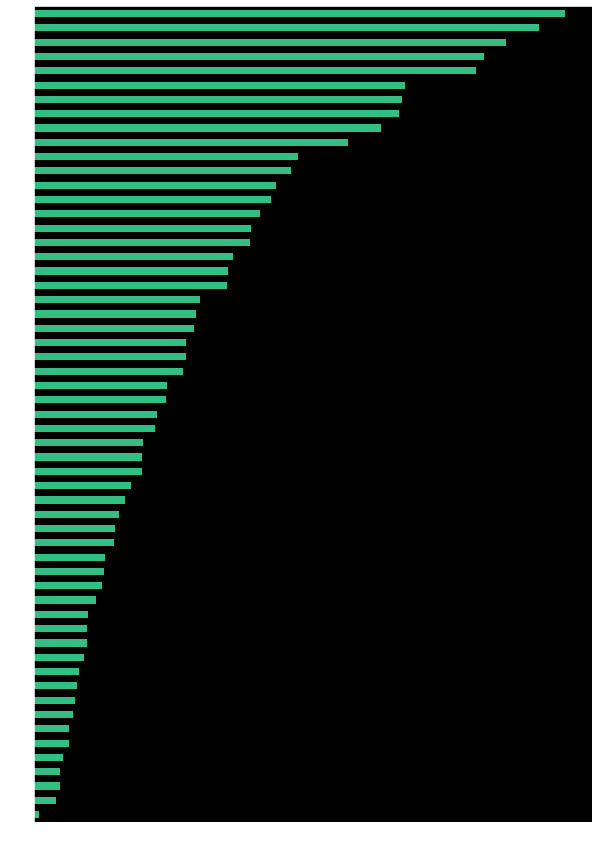

In [13]:
feat_importance.sort_values().plot(kind='barh', color=sns.xkcd_rgb['greenish teal'], figsize=[10,15])
plt.show()

1.We have list of features ranked on the basis of mutual information with target variable.

2.To choose a cut off for feature selection we can choose the point where curve flattens.

3.Let's try training with all the varibles first followed by training on selected features

In [14]:
feature_set = feat_importance[feat_importance > 0.05].index.to_list()

In [15]:
len(feature_set)

28

# split data

In [16]:
Xtrain, Xcv, Ytrain, Ycv = train_test_split(dftrain.drop(['Unnamed: 0', 'Y'], axis=1), dftrain['Y'], test_size=0.2, random_state=100)

# Scripts for model Performance

In [17]:
# Function to print model performance summary statistics

def performance_summary(model, Xtrain, Xtest, Ytrain, Ytest):
    
    Ytrain_pred = model.predict(Xtrain)
    Ytest_pred = model.predict(Xtest)

    # model performance
    # accuracy score
    print('Training Accuracy:\n', accuracy_score(Ytrain, Ytrain_pred))
    print('\n')
    print('Test Accuracy:\n', accuracy_score(Ytest, Ytest_pred))
    print('\n')
    # classification report
    print('Classification Report training:\n', classification_report(Ytrain,Ytrain_pred))
    print('\n')
    print('Classification Report test:\n', classification_report(Ytest,Ytest_pred))
    
    return

In [18]:
# Function to plot Confusion matrix

def plot_confusion_matrix(model, Xtrain, Xtest, Ytrain, Ytest):
    
    Ytrain_pred = model.predict(Xtrain)
    Ytest_pred = model.predict(Xtest)

    # confusion matrix
    fig, axs = plt.subplots(1,2,
                            figsize=[15,5])
    axs = axs.flatten()
    
    axs[0].set_title('Training data')
    # axs[0].set_xlabel('Predicted label')
    # axs[0].set_ylabel('True label')
    axs[1].set_title('Test data')
    # axs[1].set_xlabel('Predicted label')
    # axs[1].set_ylabel('True label')
    
    fig.text(0.27, 0.04, 'Predicted label', ha='center')
    fig.text(0.70, 0.04, 'Predicted label', ha='center')
    fig.text(0.04, 0.5, 'True label', va='center', rotation='vertical')
    fig.text(0.5, 0.5, 'True label', va='center', rotation='vertical')
    
    sns.heatmap(confusion_matrix(Ytrain,Ytrain_pred),
                    annot=True,
                    xticklabels=['Rejected', 'Approved'],
                    yticklabels=['Rejected', 'Approved'],
                    fmt="d",
                    ax=axs[0])
    
    sns.heatmap(confusion_matrix(Ytest,Ytest_pred),
                    annot=True,
                    xticklabels=['Rejected', 'Approved'],
                    yticklabels=['Rejected', 'Approved'],
                    fmt="d",
                    ax=axs[1])
    plt.show()
    
    return

In [19]:
# Function to plot ROC

def plot_roc(model, Xtrain, Xtest, Ytrain, Ytest):
    # ROC curve and area under ROC curve

    # get FPR and TPR for training and test data
    Ytrain_pred_proba = model.predict_proba(Xtrain)
    fpr_train, tpr_train, thresholds_train = roc_curve(Ytrain, Ytrain_pred_proba[:,1])
    # tpr fpr are swapped 
    roc_auc_train = auc(fpr_train, tpr_train)
    Ytest_pred_proba = model.predict_proba(Xtest)
    fpr_test, tpr_test, thresholds_test = roc_curve(Ytest, Ytest_pred_proba[:,1])
    # tpr fpr are swapped
    roc_auc_test = auc(fpr_test, tpr_test)

    # print area under roc curve
    print ('AUC_ROC train:\t', roc_auc_train)
    print ('AUC_ROC test:\t', roc_auc_test)

    # plot auc roc
    fig, axs = plt.subplots(1,2,
                            figsize=[15,5],
                            sharex=False,
                            sharey=False)
    
    # training data
    axs[0].set_title('Receiver Operating Characteristic training')
    axs[0].plot(fpr_train,
                tpr_train,
                sns.xkcd_rgb['greenish cyan'],
                label='AUC = %0.2f'% roc_auc_train)
    axs[0].legend(loc='lower right')
    
    axs[0].plot([0,1],[0,1],
                ls='--',
                c=sns.xkcd_rgb['red pink'])
    
    axs[0].set_xlim([-0.01,1.01])
    axs[0].set_ylim([-0.01,1.01])
    axs[0].set_ylabel('True Positive Rate')
    axs[0].set_xlabel('False Positive Rate')
    
    # test data
    axs[1].set_title('Receiver Operating Characteristic testing')
    axs[1].plot(fpr_test,
                tpr_test,
                sns.xkcd_rgb['greenish cyan'],
                label='AUC = %0.2f'% roc_auc_test)
    axs[1].legend(loc='lower right')
    
    axs[1].plot([0,1],[0,1],
                ls='--',
                c=sns.xkcd_rgb['red pink'])
    
    axs[1].set_xlim([0.0,1.0])
    axs[1].set_ylim([0.0,1.0])
    axs[1].set_ylabel('True Positive Rate')
    axs[1].set_xlabel('False Positive Rate')

    plt.show()
    
    return

# Random Forrest

Training Accuracy:
 0.9993606138107417


Test Accuracy:
 0.9552429667519181


Classification Report training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1881
           1       1.00      1.00      1.00      1247

    accuracy                           1.00      3128
   macro avg       1.00      1.00      1.00      3128
weighted avg       1.00      1.00      1.00      3128



Classification Report test:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       495
           1       0.95      0.93      0.94       287

    accuracy                           0.96       782
   macro avg       0.95      0.95      0.95       782
weighted avg       0.96      0.96      0.96       782



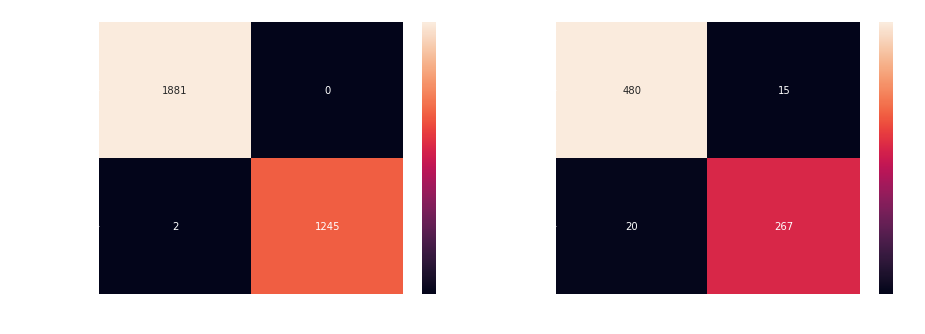

AUC_ROC train:	 0.9999991473422445
AUC_ROC test:	 0.9892830746489283


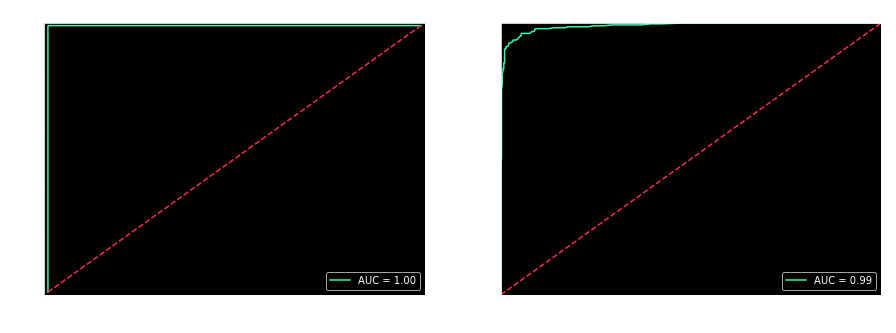

In [20]:
rf_model = RandomForestClassifier()
rf_model.fit(Xtrain, Ytrain)

# performance summary
performance_summary(rf_model, Xtrain, Xcv, Ytrain, Ycv)

# confusion matrix
plot_confusion_matrix(rf_model, Xtrain, Xcv, Ytrain, Ycv)

# ROC plot
plot_roc(rf_model, Xtrain, Xcv, Ytrain, Ycv)

# Permutaion importance

In [21]:
perm_importance = permutation_importance(rf_model, Xcv, Ycv)

In [22]:
rf_perm_sorted = pd.Series(perm_importance.importances_mean, index=Xcv.columns).sort_values()

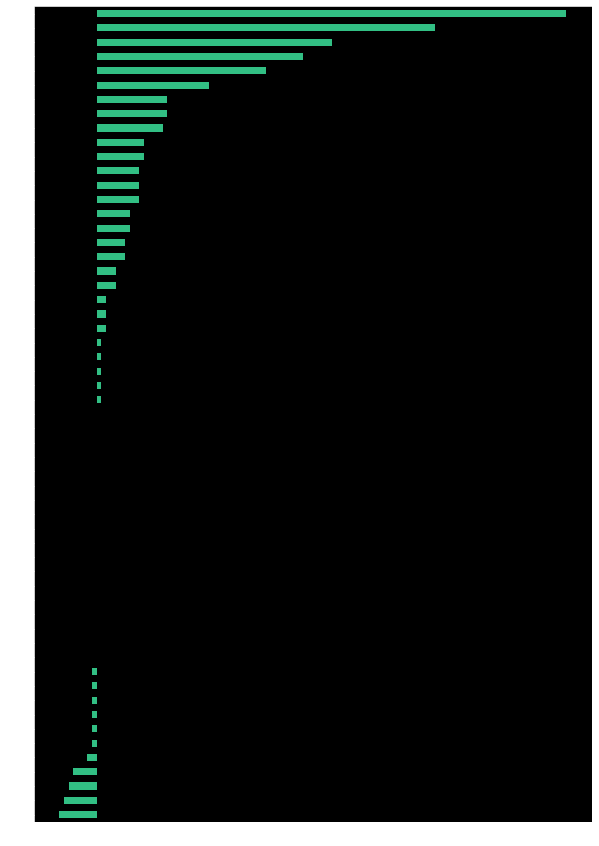

In [23]:
rf_perm_sorted.plot(kind='barh', color=sns.xkcd_rgb['greenish teal'], figsize=[10,15])
plt.show()

In [24]:
feature_set2 = rf_perm_sorted[rf_perm_sorted > 0].index.to_list()

In [25]:
len(feature_set2)

28

# Random Forest on selected features

Training Accuracy:
 0.9990409207161125


Test Accuracy:
 0.9565217391304348


Classification Report training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1881
           1       1.00      1.00      1.00      1247

    accuracy                           1.00      3128
   macro avg       1.00      1.00      1.00      3128
weighted avg       1.00      1.00      1.00      3128



Classification Report test:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       495
           1       0.95      0.93      0.94       287

    accuracy                           0.96       782
   macro avg       0.96      0.95      0.95       782
weighted avg       0.96      0.96      0.96       782



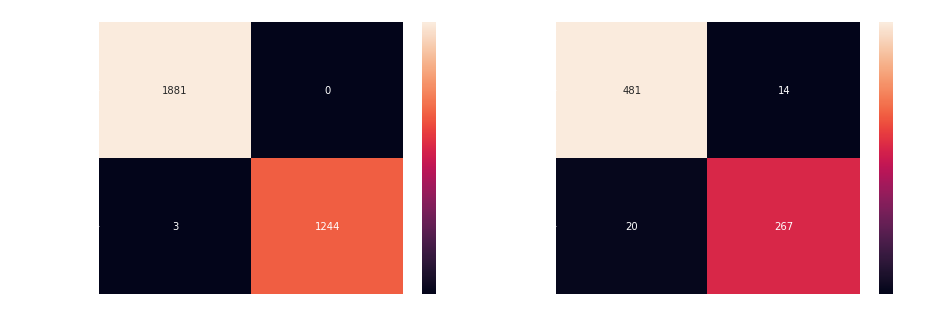

AUC_ROC train:	 0.9999876364625446
AUC_ROC test:	 0.9859324956885933


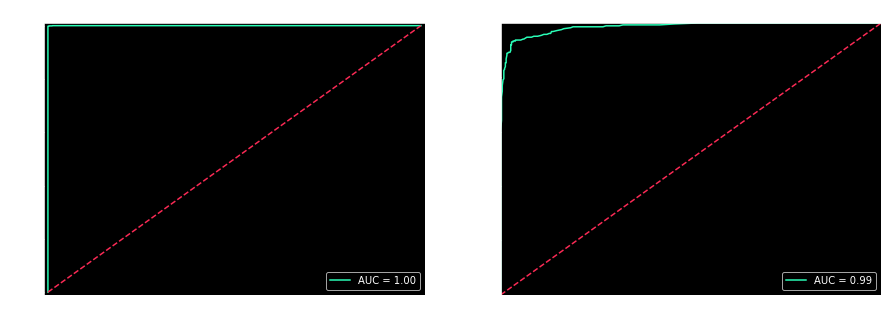

In [26]:
rf_model = RandomForestClassifier()
rf_model.fit(Xtrain[feature_set], Ytrain)

# performance summary
performance_summary(rf_model, Xtrain[feature_set], Xcv[feature_set], Ytrain, Ycv)

# confusion matrix
plot_confusion_matrix(rf_model, Xtrain[feature_set], Xcv[feature_set], Ytrain, Ycv)

# ROC plot
plot_roc(rf_model, Xtrain[feature_set], Xcv[feature_set], Ytrain, Ycv)

# Permutaion importance

In [27]:
perm_importance = permutation_importance(rf_model, Xcv[feature_set], Ycv)

In [28]:
rf_perm_sorted = pd.Series(perm_importance.importances_mean, index=feature_set).sort_values()

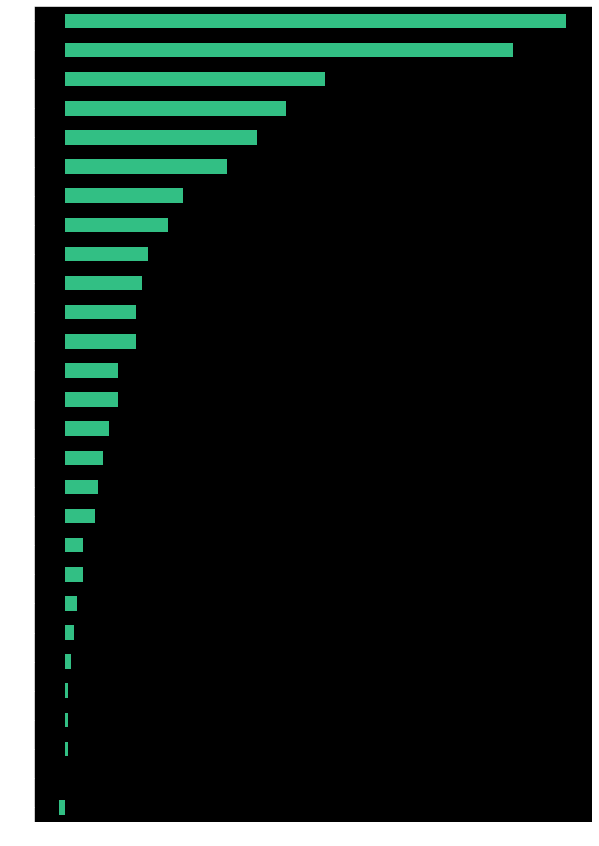

In [29]:
rf_perm_sorted.plot(kind='barh', color=sns.xkcd_rgb['greenish teal'], figsize=[10,15])
plt.show()

# Random Forest on feature set 2

Training Accuracy:
 0.9990409207161125


Test Accuracy:
 0.9552429667519181


Classification Report training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1881
           1       1.00      1.00      1.00      1247

    accuracy                           1.00      3128
   macro avg       1.00      1.00      1.00      3128
weighted avg       1.00      1.00      1.00      3128



Classification Report test:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       495
           1       0.95      0.92      0.94       287

    accuracy                           0.96       782
   macro avg       0.95      0.95      0.95       782
weighted avg       0.96      0.96      0.96       782



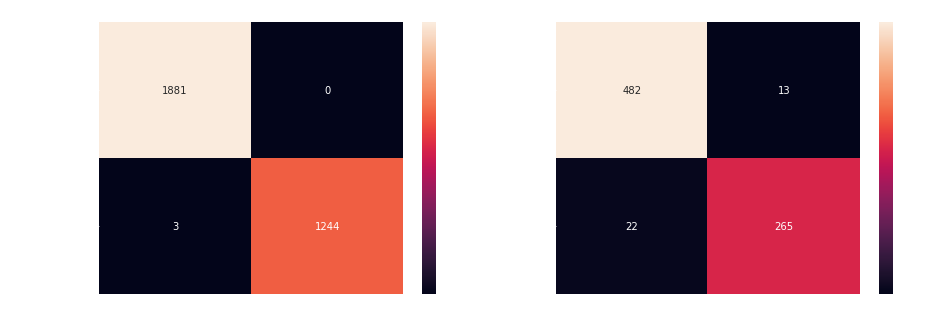

AUC_ROC train:	 0.9999848653248391
AUC_ROC test:	 0.9851511631999437


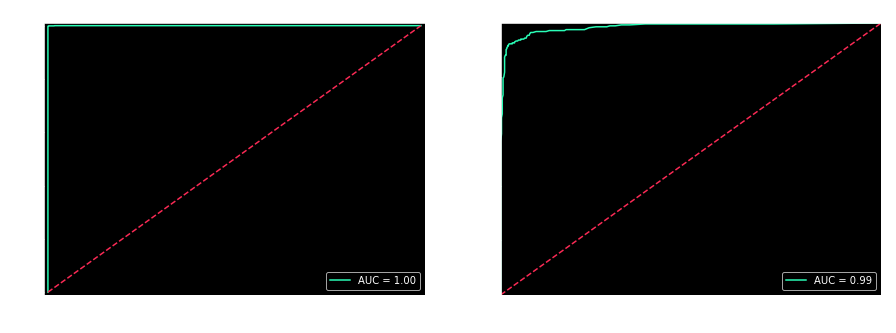

In [30]:
rf_model = RandomForestClassifier()
rf_model.fit(Xtrain[feature_set2], Ytrain)

# performance summary
performance_summary(rf_model, Xtrain[feature_set2], Xcv[feature_set2], Ytrain, Ycv)

# confusion matrix
plot_confusion_matrix(rf_model, Xtrain[feature_set2], Xcv[feature_set2], Ytrain, Ycv)

# ROC plot
plot_roc(rf_model, Xtrain[feature_set2], Xcv[feature_set2], Ytrain, Ycv)

# XGBoost

[11:43:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy:
 0.9990409207161125


Test Accuracy:
 0.9552429667519181


Classification Report training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1881
           1       1.00      1.00      1.00      1247

    accuracy                           1.00      3128
   macro avg       1.00      1.00      1.00      3128
weighted avg       1.00      1.00      1.00      3128



Classification Report test:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       495
           1       0.95      0.92      0.94       287

    accuracy                           0.96       782
   

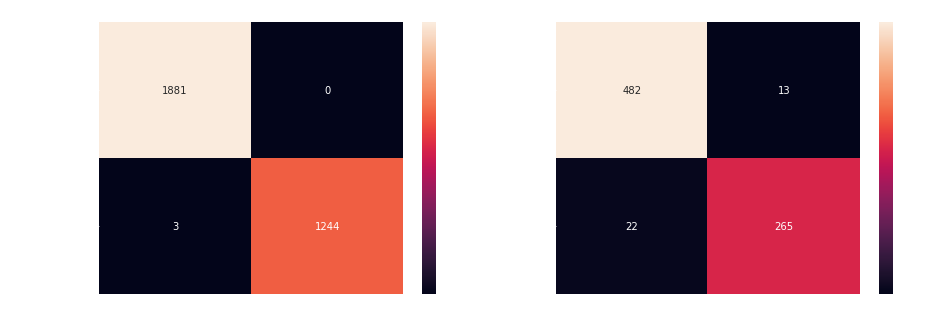

AUC_ROC train:	 0.9999848653248391
AUC_ROC test:	 0.9851511631999437


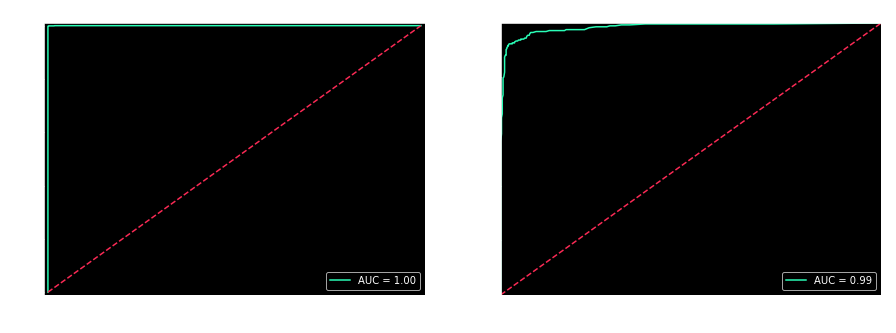

In [31]:
xgb_model = XGBClassifier()
xgb_model.fit(Xtrain[feature_set2], Ytrain)

# performance summary
performance_summary(rf_model, Xtrain[feature_set2], Xcv[feature_set2], Ytrain, Ycv)

# confusion matrix
plot_confusion_matrix(rf_model, Xtrain[feature_set2], Xcv[feature_set2], Ytrain, Ycv)

# ROC plot
plot_roc(rf_model, Xtrain[feature_set2], Xcv[feature_set2], Ytrain, Ycv)

# Predictions after feature selection

In [32]:
dftest.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,...,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,...,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,...,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,...,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


In [33]:
Xtest = dftest.drop('Unnamed: 0', axis=1)

In [34]:
Ytest_pred = rf_model.predict(Xtest[feature_set2])

In [35]:
submission = pd.DataFrame({'':dftest['Unnamed: 0'], 'Y':Ytest_pred})

In [38]:
submission.to_csv(r'C:\Users\AKASH\Desktop\Arya.AI Assignment\submission.csv', index=False)